In [1]:
import os
from glob import glob
from typing import Any, List, Tuple

import matplotlib.pyplot as plt
import matplotlib.tri as mtri
import numpy as np
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D


In [2]:
# Define the location of the directory
# path =r"C:/Users/papri/OneDrive/Dokumenti/FMF/Magistrska naloga/Python/DMV1000_test2"
path = "./DMV1000_test2"
files = glob(f'{path}/*.XYZ')

df_list = [pd.read_csv(file, delim_whitespace=True, names=['X', 'Y', 'Z'], dtype='float32') for file in files]
df = pd.concat(df_list).reset_index(drop=True)

df.X = df.X.round()
df.Y = df.Y.round()
df = df.query('Y <= 111500').sort_values(['X', 'Y'])

In [3]:
points = df.values

prep_matrix = []
row = []
for k, element in enumerate(points):
    if k == 0:
        row.append(element)
    else:
        prev_el = points[k-1]
        if abs(element[0] - prev_el[0]) > 100*0.9:
            prep_matrix.append(row)
            row = [element]
        else:
            row.append(element)

In [4]:
matrix_n = min([len(i) for i in prep_matrix])
matrix_m = len(prep_matrix)
matrix = np.empty(shape=(matrix_m, matrix_n), dtype='object')

for i, element_i in enumerate(prep_matrix):
    for j in range(0, matrix_n):
        matrix[i][j] = element_i[j]

In [5]:
# take only every n-th row and column (dense graph)
n = 3
matrix_dense = matrix#[0::n,0::n]

m = len(matrix_dense)
n = max([len(i) for i in matrix_dense])
xx = []
yy = []
zz = []
for j in range(0,n):
    for i in range(0, m):
        x = matrix_dense[i][j][1]
        y = matrix_dense[i][j][0]
        z = matrix_dense[i][j][2]
        xx.append(x)
        yy.append(y)
        zz.append(z)

triangles = []
for j in range(0,n-1):
    for i in range(0,m-1):
        T1 = [(j*m)+i,(j*m)+i+m,(j*m)+i+m+1]
        T1 = np.array(T1)
        T2 = [(j*m)+i, (j*m)+i+1, (j*m)+i+m+1]
        T2 = np.array(T2)
        triangles.append(T1)
        triangles.append(T2)

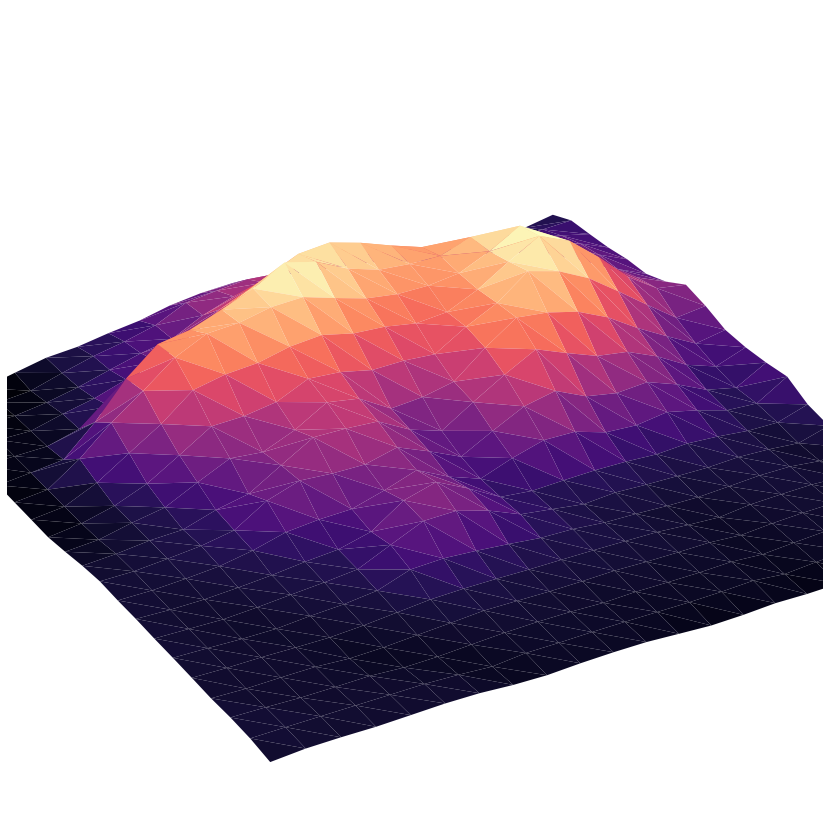

In [6]:
triangles = np.array(triangles)
xx = np.array(xx)
yy = np.array(yy)
zz = np.array(zz)

fig = plt.figure(figsize=(15,15))

ax = fig.add_subplot(projection='3d')
ax.view_init(elev=30, azim=-30)
ax.set_box_aspect((1,1,0.2), zoom=1.5)
ax.axis('off')

triang = mtri.Triangulation(xx, yy, triangles=triangles)
ax.plot_trisurf(triang, zz,  cmap="magma")